<h1>Анализ поведения пользователей в мобильном приложении</h1>

**Описание проекта**

Мы проводим аналитику для стартапа, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи его мобильного приложения. 
<br>Изучим воронку продаж. Узнаем, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?
<br>После этого исследуем результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясним, какой шрифт лучше.
<br>Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, мы можем быть уверены в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.
<br>В случае общей аналитики и A/A/B-эксперимента работаем с одними и теми же данными. В реальных проектах всегда идут эксперименты. Аналитики исследуют качество работы приложения по общим данным, не учитывая принадлежность пользователей к экспериментам.

**Описание данных**

Каждая запись в логе — это действие пользователя, или событие. 
- EventName — название события;
- DeviceIDHash — уникальный идентификатор пользователя;
- EventTimestamp — время события;
- ExpId — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

**Шаги выполнения проекта**

Шаг 1. Откроем файл с данными и изучим общую информацию
- Путь к файлу: /datasets/logs_exp.csv. Скачать датасет

Шаг 2. Подготовим данные
- Заменим названия столбцов на удобные для нас;
- Проверим пропуски и типы данных. Откорректируем, если нужно;
- Добавим столбец даты и времени, а также отдельный столбец дат;

Шаг 3. Изучим и проверим данные
- Сколько всего событий в логе?
- Сколько всего пользователей в логе?
- Сколько в среднем событий приходится на пользователя?
- Данными за какой период вы располагаем? Найдем максимальную и минимальную дату. Построим гистограмму по дате и времени. Можно ли быть уверенным, что у нас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определим, с какого момента данные полные и отбросим более старые. Данными за какой период времени мы располагаем на самом деле?
- Много ли событий и пользователей мы потеряли, отбросив старые данные?
- Проверим, что у вас есть пользователи из всех трёх экспериментальных групп.

Шаг 4. Изучим воронку событий
- Посмотрим, какие события есть в логах, как часто они встречаются. Отсортируем события по частоте.
- Посчитаем, сколько пользователей совершали каждое из этих событий. Отсортируем события по числу пользователей. Посчитаем долю пользователей, которые хоть раз совершали событие.
- Предположим, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.
- По воронке событий посчитаем, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитаем отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.
- На каком шаге теряем больше всего пользователей?
- Какая доля пользователей доходит от первого события до оплаты?

Шаг 5. Изучим результаты эксперимента
- Сколько пользователей в каждой экспериментальной группе?
- Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверим, находят ли статистические критерии разницу между выборками 246 и 247.
- Выберем самое популярное событие. Посчитаем число пользователей, совершивших это событие в каждой из контрольных групп. Посчитаем долю пользователей, совершивших это событие. Проверим, будет ли отличие между группами статистически достоверным. Проделаем то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?
- Аналогично поступим с группой с изменённым шрифтом. Сравним результаты с каждой из контрольных групп в отдельности по каждому событию. Сравним результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?
- Какой уровень значимости мы выбрали при проверке статистических гипотез выше? Посчитаем, сколько проверок статистических гипотез мы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если мы хотим изменить его, проделаем предыдущие пункты и проверим свои выводы.

<h3>Откроем файл с данными и изучим общую информацию</h3>

In [1]:
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mth
import warnings
import plotly.express as px

In [2]:
try:
    df = pd.read_csv('logs_exp.csv', sep='\t')
except:
    df = pd.read_csv('/datasets/logs_exp.csv', sep='\t')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [4]:
df.head(8)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
5,CartScreenAppear,6217807653094995999,1564055323,248
6,OffersScreenAppear,8351860793733343758,1564066242,246
7,MainScreenAppear,5682100281902512875,1564085677,246


In [5]:
df.duplicated().sum()

413

In [6]:
df.isna().sum()

EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64

Загрузили данные и изучили общую информацию о них.
<br>По результатам следующее:
- в данных обнаружено 413 дубликатов
- в данных нет пропусков
- есть нарушения стиля в названях столбцов
- надо изменить тип столбца с датой и временем на корректный
- добавить отдельный столбец с датой

<h3>Подготовим данные</h3>

In [7]:
df.columns = ['event', 'user_id', 'event_timestamp', 'exp_id']
df.head(2)

,event,user_id,event_timestamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246


In [8]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [9]:
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'], unit='s')
df['event_date'] = pd.to_datetime(df['event_timestamp'].dt.date)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event            243713 non-null  object        
 1   user_id          243713 non-null  int64         
 2   event_timestamp  243713 non-null  datetime64[ns]
 3   exp_id           243713 non-null  int64         
 4   event_date       243713 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 11.2+ MB


In [10]:
df.head()

,event,user_id,event_timestamp,exp_id,event_date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


Итого: 
- обнаруженные дубликаты устранены
- названя столбцов приведены к нужному стилю
- тип столбца с датой и временем изменен на корректный
- добавили отдельный столбец с датой

<h3>Изучим и проверим данные</h3>

Узнаем сколько всего событий и пользователей в логе, а так же сколько в среднем событий приходится на пользователя

In [11]:
df.shape[0]

243713

In [12]:
df['user_id'].nunique()

7551

In [13]:
round(df['event'].count()/df['user_id'].nunique())

32

Среднее количество событий мало говорит нам об особенностях распределения количества событий на пользователя, а так же может под влиянием выбросов в данных быть искажено, поэтому для более полной картины посмотрим как описаны данные

In [14]:
df.groupby('user_id').agg({'event': 'count'}).describe()

,event
count,7551.000000
mean,32.275593
std,65.154219
min,1.000000
25%,9.000000
50%,20.000000
75%,37.000000
max,2307.000000


Как видим 75% перцентиль равен всего 37, а максимальное значение событий - 2307, соответственно в данных присутствуют выбросы и будет лучше посчитать медианное количество событий на пользователя

In [15]:
round(df.groupby('user_id').agg({'event': 'count'}).median()[0], 1)

20.0

Медианное количество событий на пользователя - 20 событий
<br>Исходя из результатов можем сказать, что распределение имеет смещённый характер, поэтому в итоге исходить будем из медианного количества.
<br>Итого: в среднем на одного пользователя приходится 20 событий

Посмотрим, данными за какой период мы располагаем.
<br>Найдем максимальную и минимальную дату

In [16]:
print(df['event_date'].min())
print(df['event_date'].max())

2019-07-25 00:00:00
2019-08-07 00:00:00


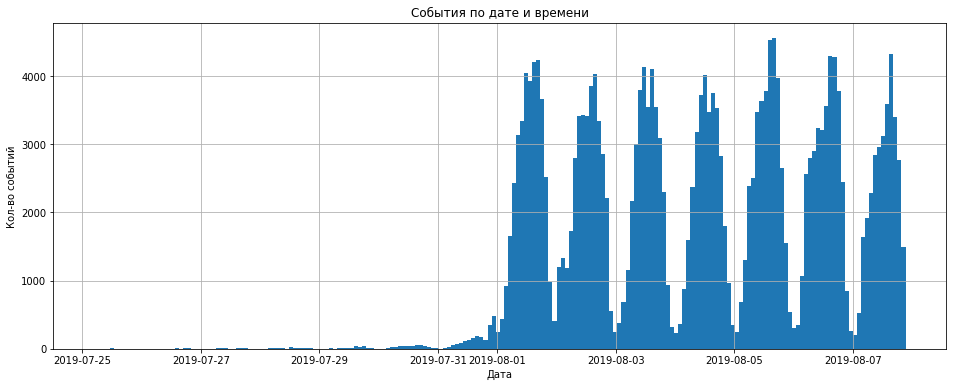

In [17]:
df['event_timestamp'].hist(bins=200, figsize=(16,6))
plt.title('События по дате и времени')
plt.ylabel('Кол-во событий')
plt.xlabel('Дата')
plt.show()

По графику видим, что за первую неделю у нас очень мало данных, основное их число приходится на вторую неделю. 
<br>Примем, что данные полные с 2019-08-01

In [18]:
data = df.query('event_timestamp >= "2019-08-01"')
data.head(8)

,event,user_id,event_timestamp,exp_id,event_date
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01
2833,MainScreenAppear,4899590676214355127,2019-08-01 00:10:15,247,2019-08-01
2834,OffersScreenAppear,3737462046622621720,2019-08-01 00:10:26,246,2019-08-01
2835,MainScreenAppear,3737462046622621720,2019-08-01 00:10:47,246,2019-08-01


Проверим, много ли событий и пользователей мы потеряли, отбросив старые данные

In [39]:
print(f'Потерянные события: ', df.shape[0] - data.shape[0])
print('Потерянные события в %: {:.2%}'.format((df.shape[0] - data.shape[0]) / df.shape[0]))

print('Потерянные пользователи: ', df['user_id'].nunique() - data['user_id'].nunique())
print('Потерянные пользователи в %: {:.2%}'.
      format((df['user_id'].nunique() - data['user_id'].nunique()) / 
             df['user_id'].nunique()))

Потерянные события:  2826
Потерянные события в %: 1.16%
Потерянные пользователи:  17
Потерянные пользователи в %: 0.23%


Как видим, потери нисколько не являются критичными для нас.
<br>Потеряно 2826 событий из 243713 (1.16%) и 17 пользователей из 7551 (0.23%)

Проверим, что у нас есть пользователи из всех трёх экспериментальных групп

In [20]:
data.groupby('exp_id').agg({'user_id': 'nunique'})

,user_id
exp_id,
246,2484
247,2513
248,2537


Да, имеем пользователей из всех 3-х групп

Мы изучили и проверили данные:
- в логе 243713 событий и 7551 пользователь
- в среднем приходится 20 событий на пользователя
- располагаем данными с 2019-07-25 по 2019-08-07, но считаем, что данные полные с 2019-08-01
- отбросив старые данные получили, что потери в событиях и пользователях малы и не являются для критичными
- у нас есть пользователи из всех трёх экспериментальных групп

<h3>Изучим воронку событий</h3>

Посмотрим, какие события есть в логах и как часто они встречаются

In [21]:
data['event'].value_counts()

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event, dtype: int64

Посчитаем, сколько пользователей совершали каждое из этих событий и посчитаем долю пользователей, которые хоть раз совершали событие

In [22]:
funnel = (data.groupby('event').agg({'user_id': 'nunique'}).
          rename(columns={'user_id' : 'total_users'}).
          sort_values(by='total_users', ascending=False).reset_index())
funnel['percent'] = funnel['total_users'] / data['user_id'].nunique() * 100
funnel

,event,total_users,percent
0,MainScreenAppear,7419,98.473586
1,OffersScreenAppear,4593,60.963632
2,CartScreenAppear,3734,49.561986
3,PaymentScreenSuccessful,3539,46.973719
4,Tutorial,840,11.149456


Имеем 5 событий, предположим, что они обозначают следующее:

- 'MainScreenAppear': главное меню
- 'OffersScreenAppear': каталог продуктов
- 'CartScreenAppear': корзина
- 'PaymentScreenSuccessful': экран успешного платежа
- 'Tutorial': руководство пользователя

Следовательно, воронка событий будет следующая:

*MainScreenAppear -> OffersScreenAppear -> CartScreenAppear -> PaymentScreenSuccessful*

Событие 'Tutorial' в воронку событий не входит.

Интересный момент с главным меню. Мы видим, что на него попали ~98,5% пользователей, т.е. не все
<br>Возможно это связано с тем, что оставшиеся пользователи просто не смогли корректно открыть приложение, либо же было некорректное отображение самого главного меню.
<br>Причин может быть много, как с нашей стороны: несовместимость/некорректная работа с некоторыми моделями устройств, версиями ОС и т.д.; так и со стороны пользователя: проблемы с интернет-подключением, программные или же механические неисправности устройства конкретного пользователя и прочее.

Посчитаем, какая доля пользователей проходит на следующий шаг воронки

In [23]:
funnel['user_share'] = (100 - (funnel['total_users'] / 
                               funnel['total_users'].shift(1)) * 100).round(2)
funnel['user_share'] = funnel['user_share'].fillna(100)
funnel = funnel[:4]
funnel

,event,total_users,percent,user_share
0,MainScreenAppear,7419,98.473586,100.00
1,OffersScreenAppear,4593,60.963632,38.09
2,CartScreenAppear,3734,49.561986,18.70
3,PaymentScreenSuccessful,3539,46.973719,5.22


Видим, что наибольшее количество пользователей теряем после первого шага - 38% (т.е. из главного в меню в каталог), 18.7% отваливаются после просмотра каталога, и только чуть более 5% добавив товары в корзину, не совершают покупку.
<br>Скорее-всего, проблема либо в дизайне главного меню, либо присутствует какая-либо сложность или неудобство перехода в каталог.

От первого события до оплаты успешно доходит 47% пользователей

<h3>Изучим результаты эксперимента</h3>

Определим сколько пользователей в каждой экспериментальной группе.

In [24]:
ex_group = data.groupby('exp_id', as_index=True)['user_id'].nunique()
ex_group['246+247'] = ex_group[246] + ex_group[247]
ex_group

exp_id
246        2484
247        2513
248        2537
246+247    4997
Name: user_id, dtype: int64

Проверим есть ли пользователи, которые присутствуют в нескольких группах теста

In [44]:
print('246 и 247:',len(
    data.loc[data['user_id'].isin(data[data['exp_id']=='246']['user_id']) & 
data['user_id'].isin(data[data['exp_id']=='247']['user_id']),'user_id'].unique()))
print('246 и 248:',len(
    data.loc[data['user_id'].isin(data[data['exp_id']=='246']['user_id']) & 
data['user_id'].isin(data[data['exp_id']=='248']['user_id']),'user_id'].unique()))
print('247 и 248:',len(
    data.loc[data['user_id'].isin(data[data['exp_id']=='247']['user_id']) & 
data['user_id'].isin(data[data['exp_id']=='248']['user_id']),'user_id'].unique()))

246 и 247: 0
246 и 248: 0
247 и 248: 0


Проверим отличие размеров групп

In [26]:
print('246 от 247:', round(ex_group[246]/ex_group[247], 2))
print('246 от 248:', round(ex_group[246]/ex_group[248], 2))
print('247 от 248:', round(ex_group[247]/ex_group[248], 2))

246 от 247: 0.99
246 от 248: 0.98
247 от 248: 0.99


Отлично! Отличия между группами незначительны и пользователи, которые присутствуют в нескольких группах теста отсутствуют

Преподготовим данные для нашего удобства, перед проведением тестов
<br>Cделаем таблицу с группировкой по событиям и количеством пользователей каждой группы по событиям

In [42]:
event_group = data.pivot_table(index='event',
                               values='user_id',
                               columns='exp_id',
                               aggfunc='nunique').reset_index()
event_group['246+247'] = event_group[246] + event_group[247]
event_group = event_group.sort_values(by=246, ascending=False)
event_group = event_group.head(4).reset_index(drop=True)
event_group

exp_id,event,246,247,248,246+247
0,MainScreenAppear,2450,2476,2493,4926
1,OffersScreenAppear,1542,1520,1531,3062
2,CartScreenAppear,1266,1238,1230,2504
3,PaymentScreenSuccessful,1200,1158,1181,2358


Cделаем таблицу с долями событий пользователей по группам

In [45]:
event_group_ratio = pd.DataFrame(event_group['event'])
event_group_ratio['246_ratio'] = (event_group[246] / 
                                  ex_group[246] * 100).round(2)
event_group_ratio['247_ratio'] = (event_group[247] / 
                                  ex_group[247] * 100).round(2)
event_group_ratio['248_ratio'] = (event_group[248] / 
                                  ex_group[248] * 100).round(2)
event_group_ratio['246+247_ratio'] = (event_group['246+247'] / 
                                      (ex_group[246] + 
                                       ex_group[247]) * 100).round(2)
event_group_ratio

,event,246_ratio,247_ratio,248_ratio,246+247_ratio
0,MainScreenAppear,98.63,98.53,98.27,98.58
1,OffersScreenAppear,62.08,60.49,60.35,61.28
2,CartScreenAppear,50.97,49.26,48.48,50.11
3,PaymentScreenSuccessful,48.31,46.08,46.55,47.19


Данные готовы, приступаем к тестам

Для проверки статистически значимой разницы между группами в событиях воронки мы будем использовать двухстороний Z-тест.

Гипотезы для проведения Z-теста:
<br>*H0*: отличие в долях пользователей, побывавших на этапе воронки между группами статистически не достоверно
<br>*H1*: отличие в долях пользователей, побывавших на этапе воронки между группами статистически достоверно

Создадим функцию для проведения z-теста

In [48]:
def z_test(group1, group2, alpha):
    for i in event_group.index:
        p1 = event_group[group1][i] / ex_group[group1]
        p2 = event_group[group2][i] / ex_group[group2]
        
        p_combined = (event_group[group1][i] + 
                      event_group[group2][i]) / (ex_group[group1] + ex_group[group2])
        difference = p1 - p2
        
        z_value = (difference / mth.sqrt(p_combined * (1 - p_combined) *
                    (1 / ex_group[group1] + 1 / ex_group[group2])))
        distr = st.norm(0, 1) 
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        
        print('Событие:', event_group['event'][i])
        print('Уровень P-value:', p_value)
        
        if (p_value < alpha):
            print("Отвергаем нулевую гипотезу")
        else:
            print("Не получилось отвергнуть нулевую гипотезу")
            
        print()

**Группы 246 и 247**

In [30]:
z_test(246, 247, 0.01)

Событие: MainScreenAppear
Уровень P-value: 0.7570597232046099
Не получилось отвергнуть нулевую гипотезу

Событие: OffersScreenAppear
Уровень P-value: 0.2480954578522181
Не получилось отвергнуть нулевую гипотезу

Событие: CartScreenAppear
Уровень P-value: 0.22883372237997213
Не получилось отвергнуть нулевую гипотезу

Событие: PaymentScreenSuccessful
Уровень P-value: 0.11456679313141849
Не получилось отвергнуть нулевую гипотезу



По итогам проведенных 4-х тестов, отличие между группами 246 и 247 статистически не достоверно, а они у нас являются контрольными.
<br>Следовательно, по итогам А/А теста можно сказать, что разбиение трафика на группы корректно.

**Группы 246 и 248**

In [31]:
z_test(246, 248, 0.01)

Событие: MainScreenAppear
Уровень P-value: 0.2949721933554552
Не получилось отвергнуть нулевую гипотезу

Событие: OffersScreenAppear
Уровень P-value: 0.20836205402738917
Не получилось отвергнуть нулевую гипотезу

Событие: CartScreenAppear
Уровень P-value: 0.07842923237520116
Не получилось отвергнуть нулевую гипотезу

Событие: PaymentScreenSuccessful
Уровень P-value: 0.2122553275697796
Не получилось отвергнуть нулевую гипотезу



Отличие между группами 246 и 248 статистически не достоверно

**Группы 247 и 248**

In [32]:
z_test(247, 248, 0.01)

Событие: MainScreenAppear
Уровень P-value: 0.4587053616621515
Не получилось отвергнуть нулевую гипотезу

Событие: OffersScreenAppear
Уровень P-value: 0.9197817830592261
Не получилось отвергнуть нулевую гипотезу

Событие: CartScreenAppear
Уровень P-value: 0.5786197879539783
Не получилось отвергнуть нулевую гипотезу

Событие: PaymentScreenSuccessful
Уровень P-value: 0.7373415053803964
Не получилось отвергнуть нулевую гипотезу



Отличие между группами 247 и 248 статистически не достоверно

**Группы 246+247 и 248**

In [33]:
z_test('246+247', 248, 0.01)

Событие: MainScreenAppear
Уровень P-value: 0.29424526837179577
Не получилось отвергнуть нулевую гипотезу

Событие: OffersScreenAppear
Уровень P-value: 0.43425549655188256
Не получилось отвергнуть нулевую гипотезу

Событие: CartScreenAppear
Уровень P-value: 0.18175875284404386
Не получилось отвергнуть нулевую гипотезу

Событие: PaymentScreenSuccessful
Уровень P-value: 0.6004294282308704
Не получилось отвергнуть нулевую гипотезу



Отличие между контрольными группами 246 и 247 и группой 248 статистически не достоверно

При проверке гипотез статистическая значимостть была равна 0.01 из-за большого размера тестируемых групп.
<br>Мы провели 16 тестов, и при таком количестве возникает вероятность ошибки первого рода.
<br>Проверим оптимальность выбранного уровня стат.значимости используя поправку Бонферрони:

In [34]:
alpha_bon = 0.01/16
print(f'Коэффициент статистической значимости с учетом поправки Бонферрони: {alpha_bon}')

Коэффициент статистической значимости с учетом поправки Бонферрони: 0.000625


In [35]:
z_test(246, 247, alpha_bon)

Событие: MainScreenAppear
Уровень P-value: 0.7570597232046099
Не получилось отвергнуть нулевую гипотезу

Событие: OffersScreenAppear
Уровень P-value: 0.2480954578522181
Не получилось отвергнуть нулевую гипотезу

Событие: CartScreenAppear
Уровень P-value: 0.22883372237997213
Не получилось отвергнуть нулевую гипотезу

Событие: PaymentScreenSuccessful
Уровень P-value: 0.11456679313141849
Не получилось отвергнуть нулевую гипотезу



In [36]:
z_test(246, 248, alpha_bon)

Событие: MainScreenAppear
Уровень P-value: 0.2949721933554552
Не получилось отвергнуть нулевую гипотезу

Событие: OffersScreenAppear
Уровень P-value: 0.20836205402738917
Не получилось отвергнуть нулевую гипотезу

Событие: CartScreenAppear
Уровень P-value: 0.07842923237520116
Не получилось отвергнуть нулевую гипотезу

Событие: PaymentScreenSuccessful
Уровень P-value: 0.2122553275697796
Не получилось отвергнуть нулевую гипотезу



In [37]:
z_test(247, 248, alpha_bon)

Событие: MainScreenAppear
Уровень P-value: 0.4587053616621515
Не получилось отвергнуть нулевую гипотезу

Событие: OffersScreenAppear
Уровень P-value: 0.9197817830592261
Не получилось отвергнуть нулевую гипотезу

Событие: CartScreenAppear
Уровень P-value: 0.5786197879539783
Не получилось отвергнуть нулевую гипотезу

Событие: PaymentScreenSuccessful
Уровень P-value: 0.7373415053803964
Не получилось отвергнуть нулевую гипотезу



In [38]:
z_test('246+247', 248, alpha_bon)

Событие: MainScreenAppear
Уровень P-value: 0.29424526837179577
Не получилось отвергнуть нулевую гипотезу

Событие: OffersScreenAppear
Уровень P-value: 0.43425549655188256
Не получилось отвергнуть нулевую гипотезу

Событие: CartScreenAppear
Уровень P-value: 0.18175875284404386
Не получилось отвергнуть нулевую гипотезу

Событие: PaymentScreenSuccessful
Уровень P-value: 0.6004294282308704
Не получилось отвергнуть нулевую гипотезу



После применения поправки Бонферрони мы также получили результат, который подтверждает оптимальность выбранной нами ранее велечины стат.значимости - во всех тестах нулевые гипотезы не были отвергнуты.

<h3>Итоговый вывод</h3>

Мы открыли и предобработали данные:
- обнаруженные дубликаты устранены
- названя столбцов приведены к нужному стилю
- тип столбца с датой и временем изменен на корректный
- добавили отдельный столбец с датой

Мы изучили и проверили данные:
- в логе 243713 событий и 7551 пользователь
- в среднем приходится 20 событий на пользователя
- располагаем данными с 2019-07-25 по 2019-08-07, но считаем, что данные полные с 2019-08-01
- отбросив старые данные получили, что потери в событиях и пользователях малы и не являются для критичными
- у нас есть пользователи из всех трёх экспериментальных групп

Изучили воронку событий:

- всего имели 5 событий, но cобытие 'Tutorial' в воронку событий не входит, поэтому получилась следующая:
  - MainScreenAppear -> OffersScreenAppear -> CartScreenAppear -> PaymentScreenSuccessful
- наибольшее количество пользователей теряем после первого шага - 38% (т.е. из главного в меню в каталог)
- 18.7% отваливаются после просмотра каталога
- чуть более 5% добавив товары в корзину, не совершают покупку.
- от первого события до оплаты успешно доходит 47% пользователей

Скорее-всего, проблема потери пользователей после первого шага заключается либо в дизайне главного меню, либо присутствует какая-либо сложность или неудобство перехода в каталог.

Изучили результаты эксперимента:
- узнали кол-во пользователй в каждой группе
  - В группе 246 - 2484 пользователей
  - В группе 247 - 2513 пользователей
  - В группе 248 - 2537 пользователей
  - В объединенной контрольной группе 246+247- 4997 пользователей
- выяснили, что отличия между группами незначительны и пользователи, которые присутствуют в нескольких группах теста отсутствуют
- преподготовили данные для нашего удобства, перед проведением тестов
- проведелия z-тесты c уровнем значимости в 0.01 со следующими результатами:
  - Отличие между группами 246 и 247 статистически не достоверно
  - Отличие между группами 246 и 248 статистически не достоверно
  - Отличие между группами 247 и 248 статистически не достоверно
  - Отличие между контрольными группами 246 и 247 и группой 248 статистически не достоверно
- после применения поправки Бонферрони мы также получили результат, который подтверждает оптимальность выбранной нами ранее велечины стат.значимости

**По результатам A/A/B-теста изменение шрифта на пользователей не повлияет.** 
<br>*Если дизайнеры хотят - пусть спокойно меняют, менеджерам можно не волноваться.*